In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
%matplotlib inline

Reading the dataset 

In [3]:
data_main_df = pd.read_csv("PEP1.csv")

Check for head, tail, shape of  the dataset

In [4]:
data_main_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
data_main_df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [6]:
data_main_df.shape

(1460, 81)

Check for null and unique

In [7]:
data_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data_main_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
data_main_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [10]:
data_main_df.isna().sum(axis = 0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
for i in data_main_df.columns:
    print()
    print(i,"Unique",len(data_main_df[i].unique()))
    if data_main_df[i].isna().sum() >0:
        print("null count")
        print(i, data_main_df[i].isna().sum())


Id Unique 1460

MSSubClass Unique 15

MSZoning Unique 5

LotFrontage Unique 111
null count
LotFrontage 259

LotArea Unique 1073

Street Unique 2

Alley Unique 3
null count
Alley 1369

LotShape Unique 4

LandContour Unique 4

Utilities Unique 2

LotConfig Unique 5

LandSlope Unique 3

Neighborhood Unique 25

Condition1 Unique 9

Condition2 Unique 8

BldgType Unique 5

HouseStyle Unique 8

OverallQual Unique 10

OverallCond Unique 9

YearBuilt Unique 112

YearRemodAdd Unique 61

RoofStyle Unique 6

RoofMatl Unique 8

Exterior1st Unique 15

Exterior2nd Unique 16

MasVnrType Unique 5
null count
MasVnrType 8

MasVnrArea Unique 328
null count
MasVnrArea 8

ExterQual Unique 4

ExterCond Unique 5

Foundation Unique 6

BsmtQual Unique 5
null count
BsmtQual 37

BsmtCond Unique 5
null count
BsmtCond 37

BsmtExposure Unique 5
null count
BsmtExposure 38

BsmtFinType1 Unique 7
null count
BsmtFinType1 37

BsmtFinSF1 Unique 637

BsmtFinType2 Unique 7
null count
BsmtFinType2 38

BsmtFinSF2 Unique 144


Dropping columns whicha have more null values ( here decidieng if is has like >1000

In [12]:
data_main_df = data_main_df.drop(['Alley','MiscFeature','Fence', 'PoolQC'],axis = 1)
data_main_df.shape

(1460, 77)

Seaparation of Numerical and Categorical variables

In [13]:
num_variables = data_main_df._get_numeric_data().columns
num_variables

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
cat_variables = list(set(data_main_df.columns) - set(data_main_df._get_numeric_data().columns))
cat_variables

['CentralAir',
 'BsmtExposure',
 'HouseStyle',
 'Electrical',
 'BsmtCond',
 'Exterior2nd',
 'PavedDrive',
 'LandSlope',
 'LotConfig',
 'Heating',
 'MasVnrType',
 'LotShape',
 'Street',
 'ExterQual',
 'Exterior1st',
 'GarageCond',
 'RoofStyle',
 'BsmtFinType2',
 'RoofMatl',
 'LandContour',
 'Functiol',
 'SaleCondition',
 'Condition2',
 'KitchenQual',
 'Utilities',
 'BldgType',
 'Foundation',
 'GarageFinish',
 'GarageType',
 'Neighborhood',
 'MSZoning',
 'ExterCond',
 'FireplaceQu',
 'BsmtQual',
 'HeatingQC',
 'Condition1',
 'GarageQual',
 'BsmtFinType1',
 'SaleType']

Missing Value Treatment

In [15]:
for i in num_variables:
    if data_main_df[i].isna().sum() > 0:
        print(i,data_main_df[i].isna().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [16]:
data_main_df['LotFrontage'].fillna(data_main_df['LotFrontage'].mean(), inplace = True)
data_main_df['MasVnrArea'].fillna(data_main_df['MasVnrArea'].mean(), inplace = True)

C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_28684\3739844498.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_main_df.corr(), cmap='viridis')


<Axes: >

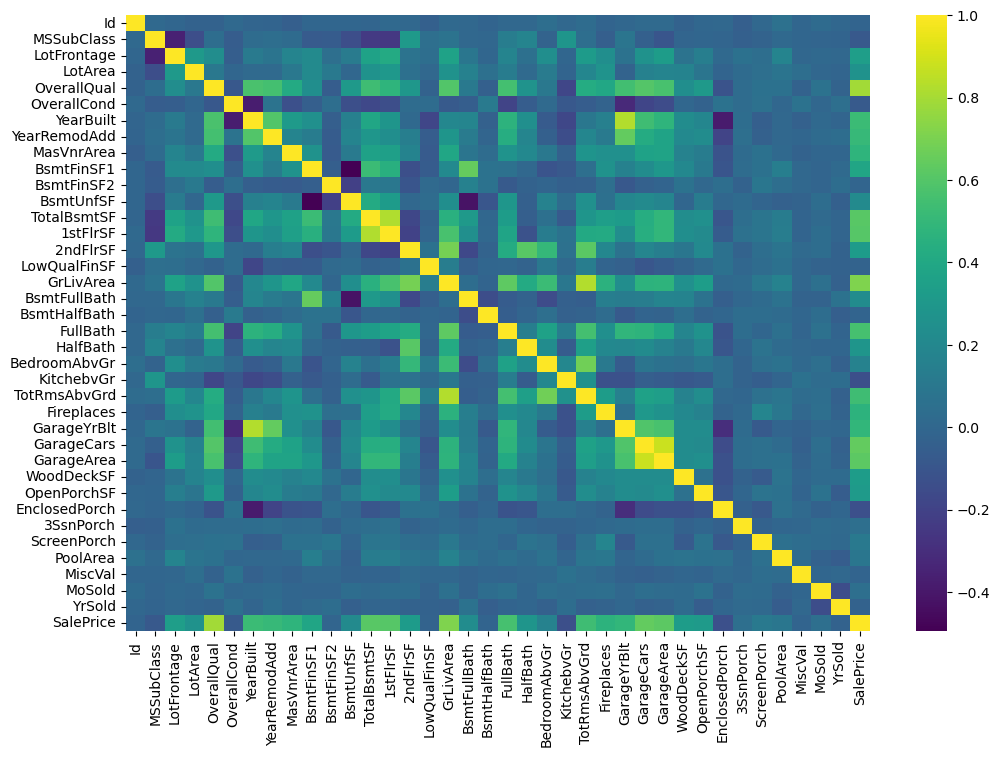

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(data_main_df.corr(), cmap='viridis')

Droppping further more columns, as YearBuilt & GarageYrBlt and TotRmsAbvGrd & GrLivArea are highly coorelated

In [18]:
data_main_df = data_main_df.drop(['GarageYrBlt','TotRmsAbvGrd'],axis = 1)
data_main_df.shape

(1460, 75)

Finding columns with lots of Zeros, (>=50% of the row count), dropping them

In [19]:
zero_df = data_main_df.loc[:,data_main_df.eq(0).any()]
zero_df.eq(0).sum()
zero_df = zero_df.loc[:,zero_df.eq(0).sum() >= (data_main_df.shape[0]/2)]

In [20]:
zero_df.columns

Index(['MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [21]:
data_main_df = data_main_df.drop(zero_df.columns,axis = 1)
data_main_df.shape

(1460, 62)

Updating Numeric and  Categorical variables

In [22]:
num_variables = data_main_df._get_numeric_data().columns
num_variables

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchebvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
cat_variables = list(set(data_main_df.columns) - set(data_main_df._get_numeric_data().columns))
cat_variables

['CentralAir',
 'BsmtExposure',
 'HouseStyle',
 'Electrical',
 'BsmtCond',
 'Exterior2nd',
 'PavedDrive',
 'LandSlope',
 'LotConfig',
 'Heating',
 'MasVnrType',
 'LotShape',
 'Street',
 'Exterior1st',
 'ExterQual',
 'GarageCond',
 'RoofStyle',
 'BsmtFinType2',
 'RoofMatl',
 'LandContour',
 'Functiol',
 'SaleCondition',
 'Condition2',
 'KitchenQual',
 'Utilities',
 'BldgType',
 'Foundation',
 'GarageFinish',
 'GarageType',
 'Neighborhood',
 'MSZoning',
 'ExterCond',
 'FireplaceQu',
 'BsmtQual',
 'HeatingQC',
 'Condition1',
 'GarageQual',
 'BsmtFinType1',
 'SaleType']

C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_28684\3739844498.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_main_df.corr(), cmap='viridis')


<Axes: >

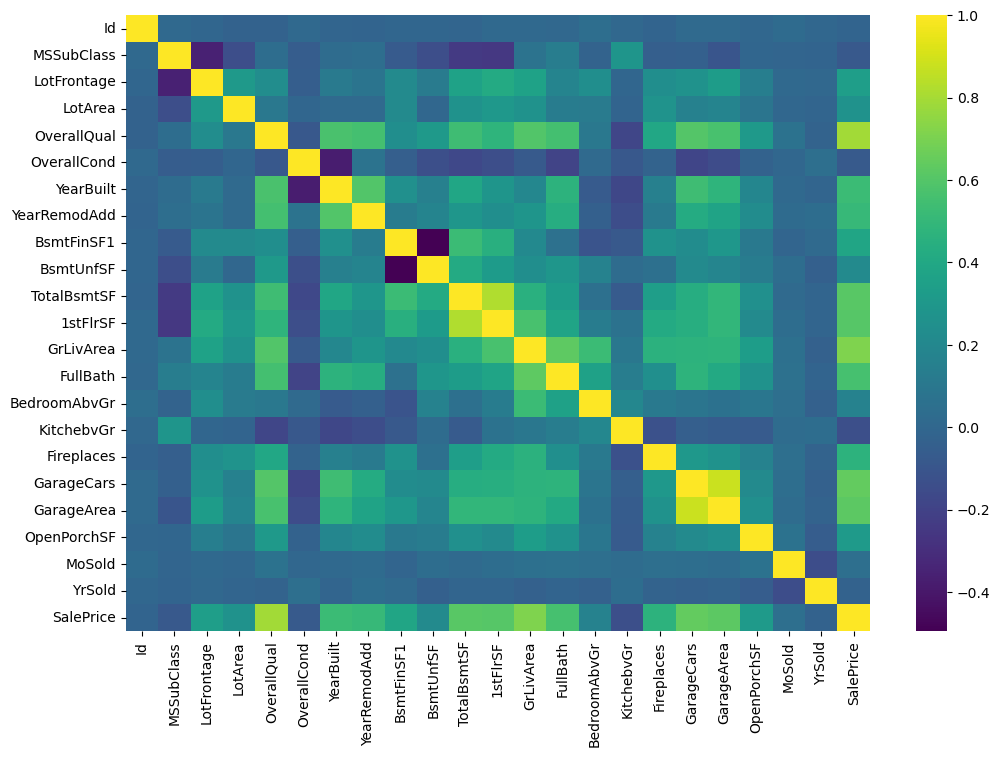

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(data_main_df.corr(), cmap='viridis')

Numeric EDA 

It's decided that YearBuilt, TotalBsmtSF, GrLivArea are  ariables we have  to check  against SalePrice(Target Value)

Check for Skewness Univariate Analysis

In [25]:
num_var_df = data_main_df[num_variables]
num_var_df.skew()

Id               0.000000
MSSubClass       1.407657
LotFrontage      2.384950
LotArea         12.207688
OverallQual      0.216944
OverallCond      0.693067
YearBuilt       -0.613461
YearRemodAdd    -0.503562
BsmtFinSF1       1.685503
BsmtUnfSF        0.920268
TotalBsmtSF      1.524255
1stFlrSF         1.376757
GrLivArea        1.366560
FullBath         0.036562
BedroomAbvGr     0.211790
KitchebvGr       4.488397
Fireplaces       0.649565
GarageCars      -0.342549
GarageArea       0.179981
OpenPorchSF      2.364342
MoSold           0.212053
YrSold           0.096269
SalePrice        1.882876
dtype: float64

In [26]:
num_corr_mat = num_var_df.corr()
sign_numm_vars = num_corr_mat['SalePrice'].abs().sort_values(ascending=False).index.tolist()
sign_numm_vars

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'OpenPorchSF',
 'LotArea',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'KitchebvGr',
 'MSSubClass',
 'OverallCond',
 'MoSold',
 'YrSold',
 'Id']

Its  decided 'YearBuilt', 'TotalBsmtSF', 'GrLivArea' are significant variables for numeric data

C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_28684\2091481577.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_main_df[num_cols[i]], kde=True)
C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_28684\2091481577.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_main_df[nu

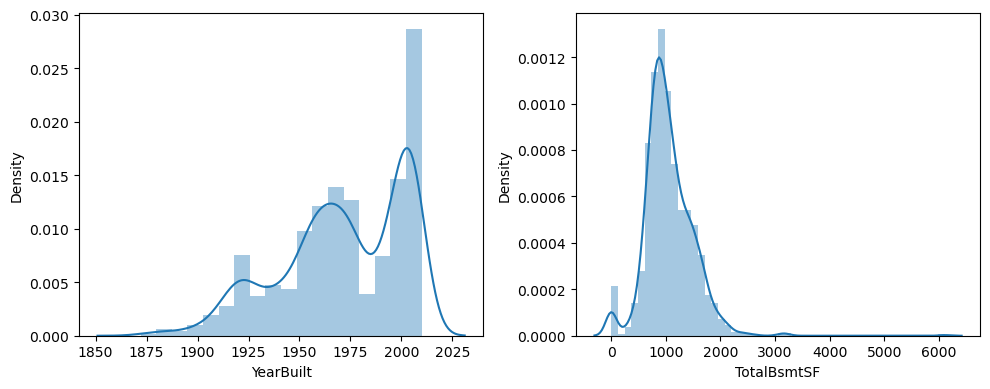

C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_28684\2091481577.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_main_df[num_cols[i]], kde=True)
C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_28684\2091481577.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_main_df[nu

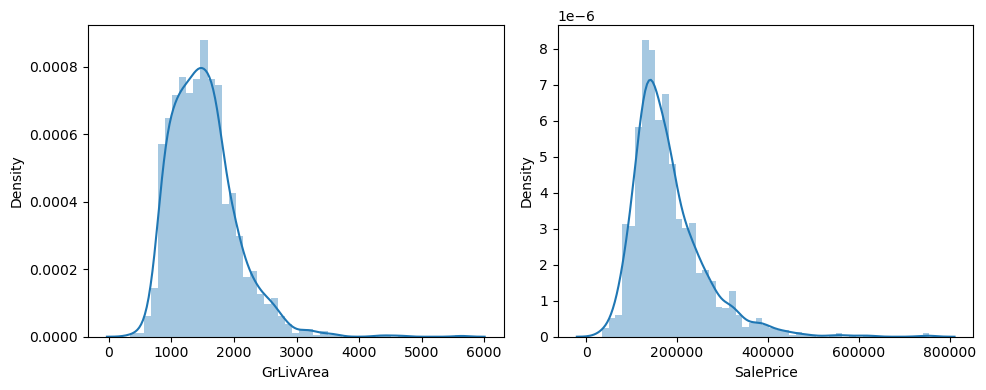

In [27]:
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
for i in range(0,len(num_cols),2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(data_main_df[num_cols[i]], kde=True)
    if i+1 < len(num_cols):
        plt.subplot(122)
        sns.distplot(data_main_df[num_cols[i+1]], kde=True)
    plt.tight_layout()
    plt.show();       

We can see  YearBuilt is Right skewed nad others are left skewed

Check  Dstribution

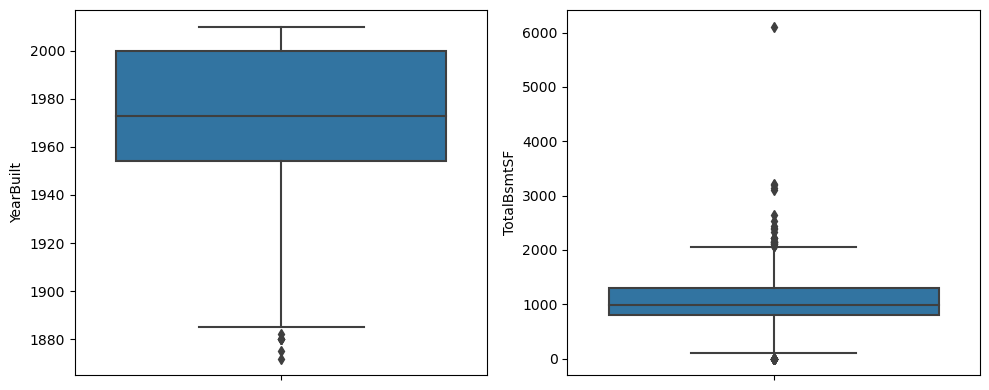

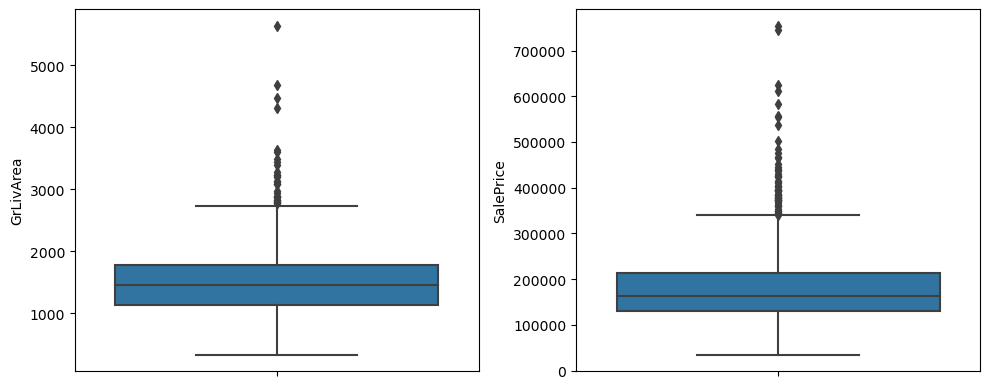

In [28]:
for i in range(0,len(num_cols),2):
    
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(x= None, y = data_main_df[num_cols[i]],data = data_main_df)
    if i+1 < len(num_cols):
        plt.subplot(122)            
        sns.boxplot(x= None, y = data_main_df[num_cols[i+1]],data = data_main_df)
    plt.tight_layout()
    plt.show()

Multi Variate analysis

YearBuilt vs SalePrice

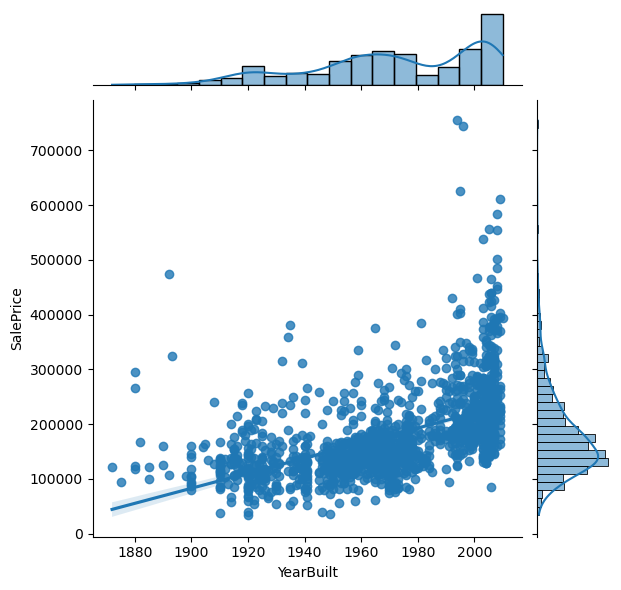

In [29]:
sns.jointplot(x = 'YearBuilt',y= 'SalePrice', data=data_main_df, kind = 'reg')

TotalBsmtSF vs SalePrice

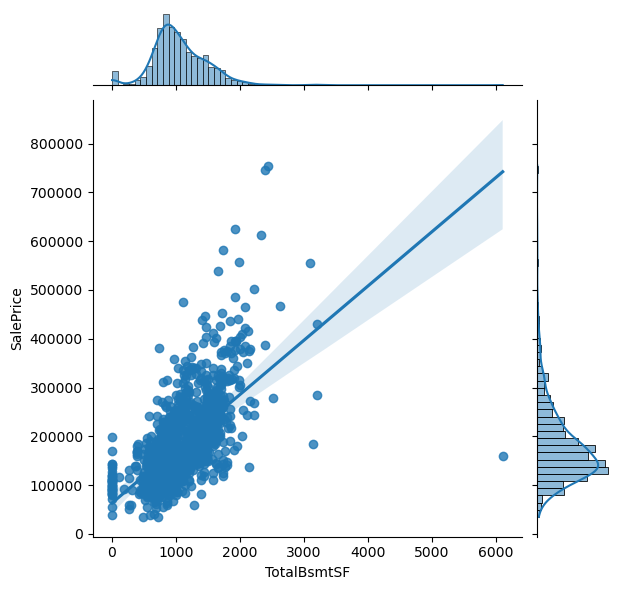

In [30]:
sns.jointplot(x = 'TotalBsmtSF',y= 'SalePrice', data=data_main_df, kind='reg')

GrLivArea vs SalePrice

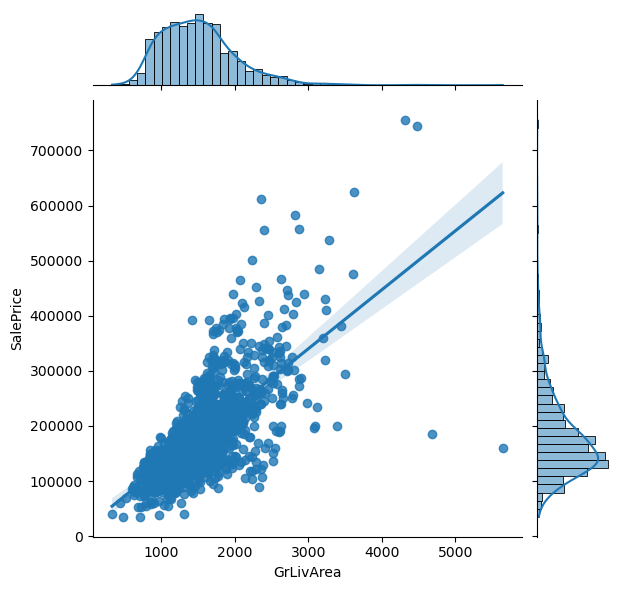

In [31]:
sns.jointplot(x = 'GrLivArea',y= 'SalePrice', data=data_main_df, kind='reg')

Relation between top 10 variables with SalePrice


C:\Users\RAGHAV KRISHNA\AppData\Local\Temp\ipykernel_28684\4020110038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = data_main_df.corr().nlargest(k, 'SalePrice')['SalePrice'].index


<Axes: >

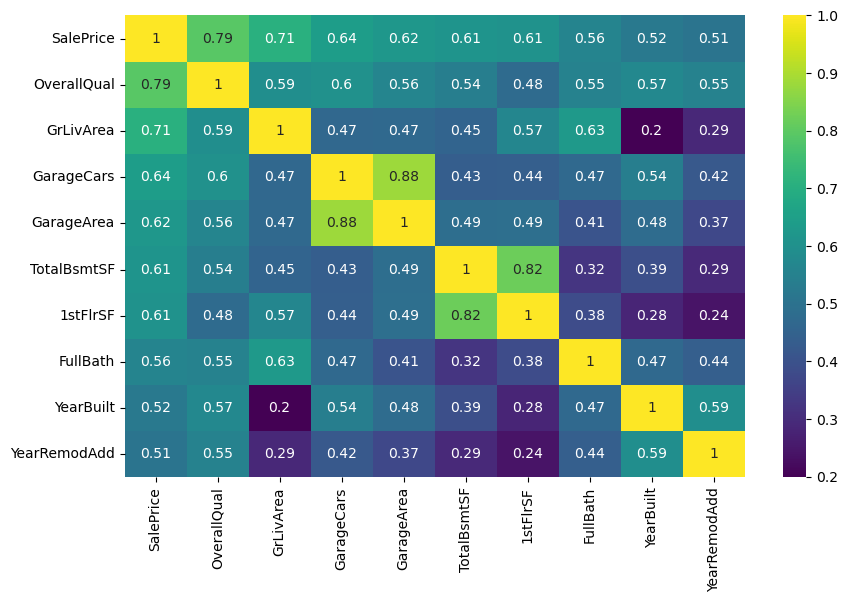

In [32]:
k = 10 #number of variables for heatmap
cols = data_main_df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = data_main_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')


OverallQual and GrLiv Area are stongly correlated with SalePrice

Pairplot for all related numeric variables in one

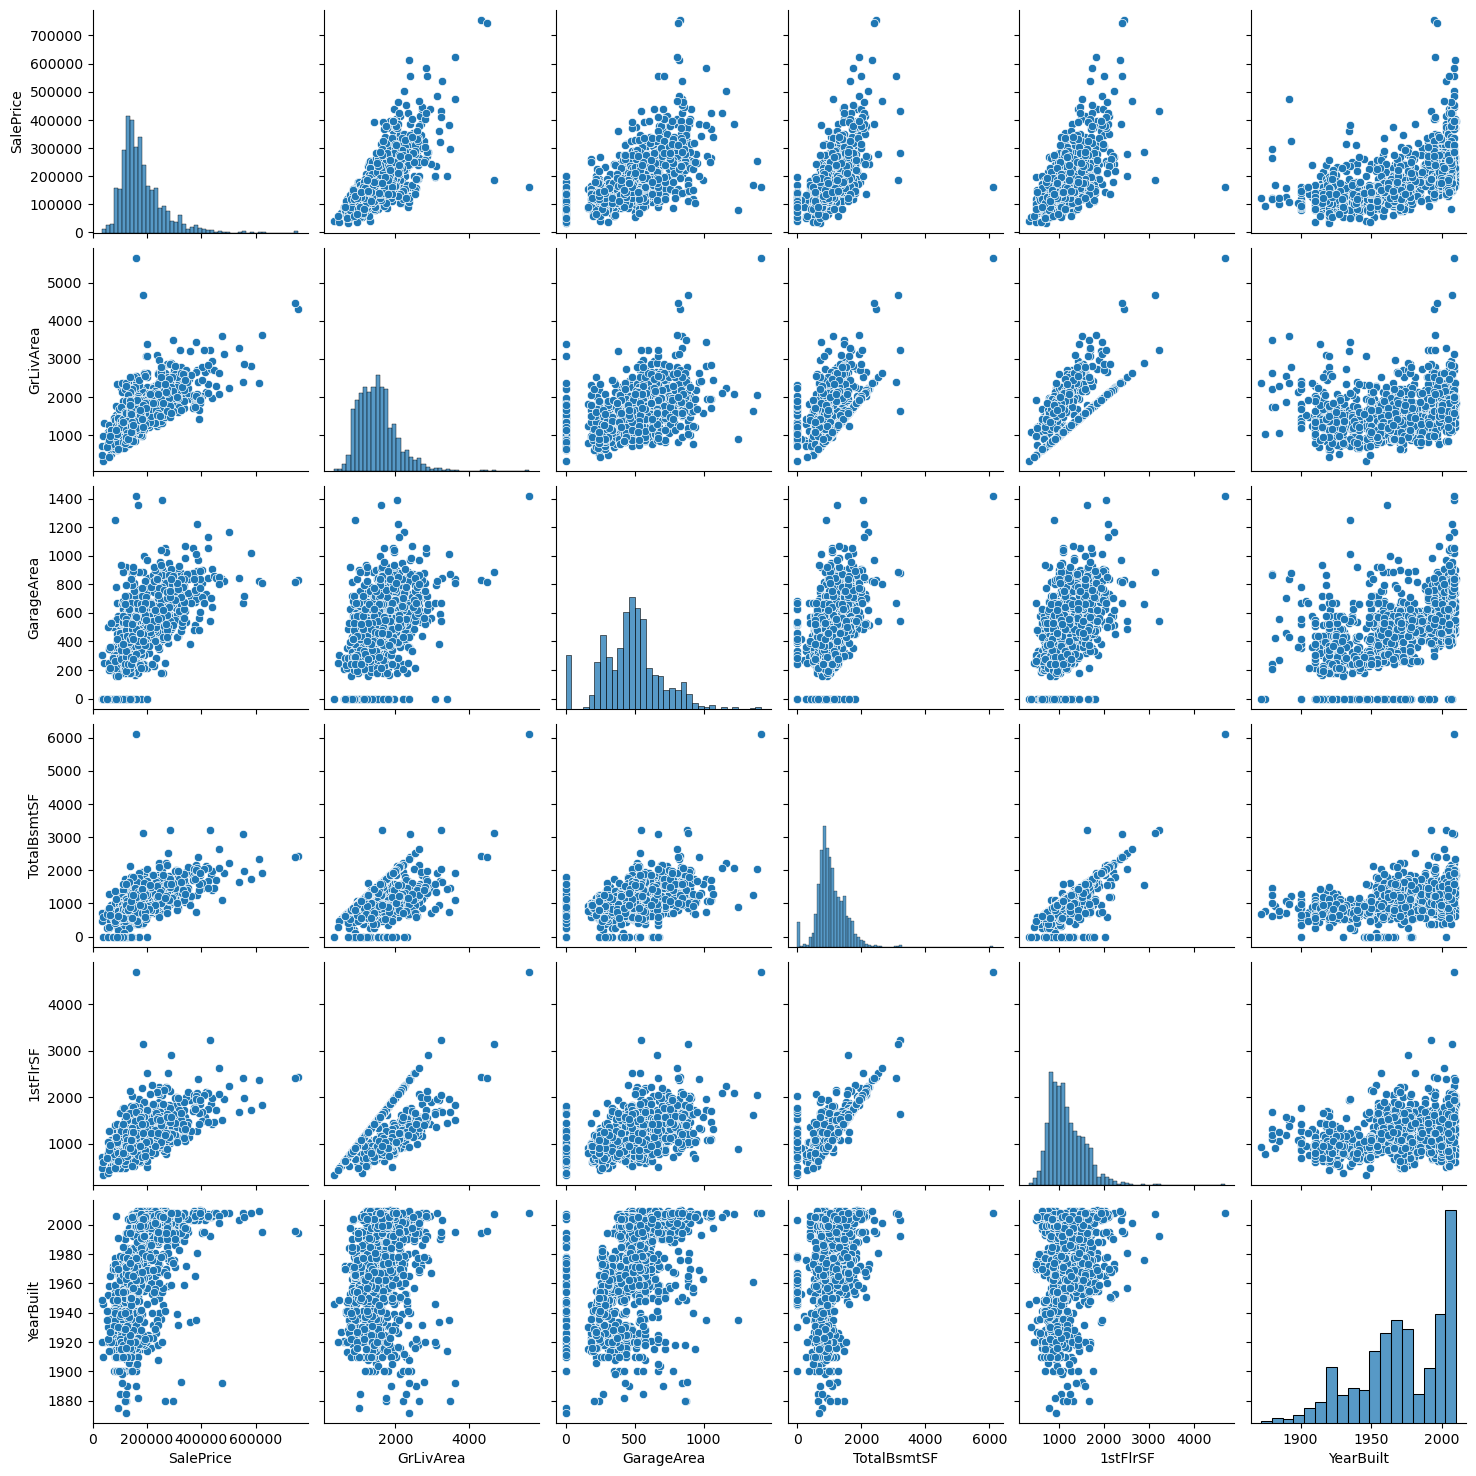

In [33]:
cols = ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
sns.pairplot(data_main_df[cols])

Categorical EDA

Checking Salecondition and Neighborhood

In [34]:
cat_var_df = data_main_df[cat_variables]

<Axes: xlabel='SaleCondition', ylabel='count'>

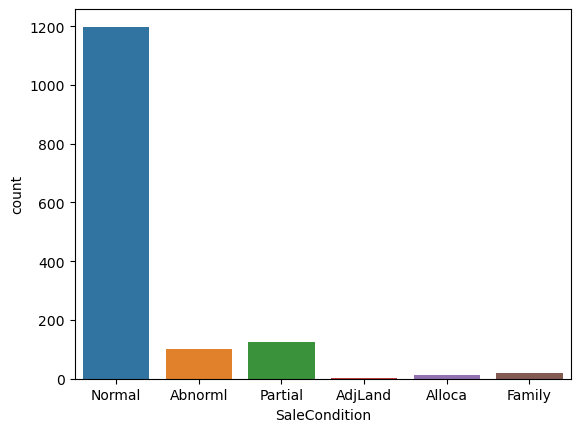

In [35]:
 sns.countplot(x = 'SaleCondition', data=data_main_df)

<Axes: xlabel='count', ylabel='Neighborhood'>

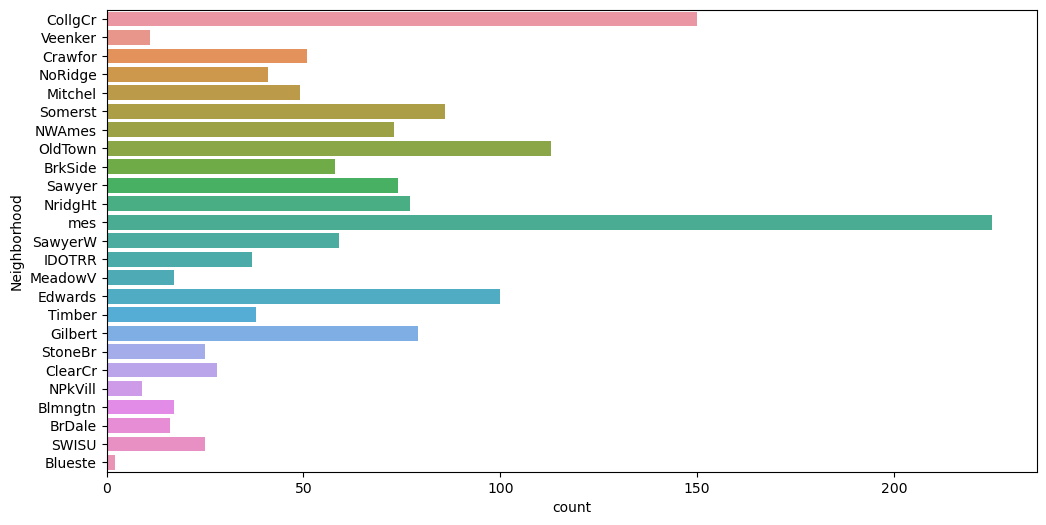

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(y='Neighborhood', data=data_main_df)

Check fo rmissing value treatment

In [37]:
for i in cat_variables:
    if data_main_df[i].isna().sum() > 0:
        print(i,data_main_df[i].isna().sum())

BsmtExposure 38
Electrical 1
BsmtCond 37
MasVnrType 8
GarageCond 81
BsmtFinType2 38
GarageFinish 81
GarageType 81
FireplaceQu 690
BsmtQual 37
GarageQual 81
BsmtFinType1 37


No significant varibales to treat, but usually it can be treated with imputing mode

Bivariate Analysis

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

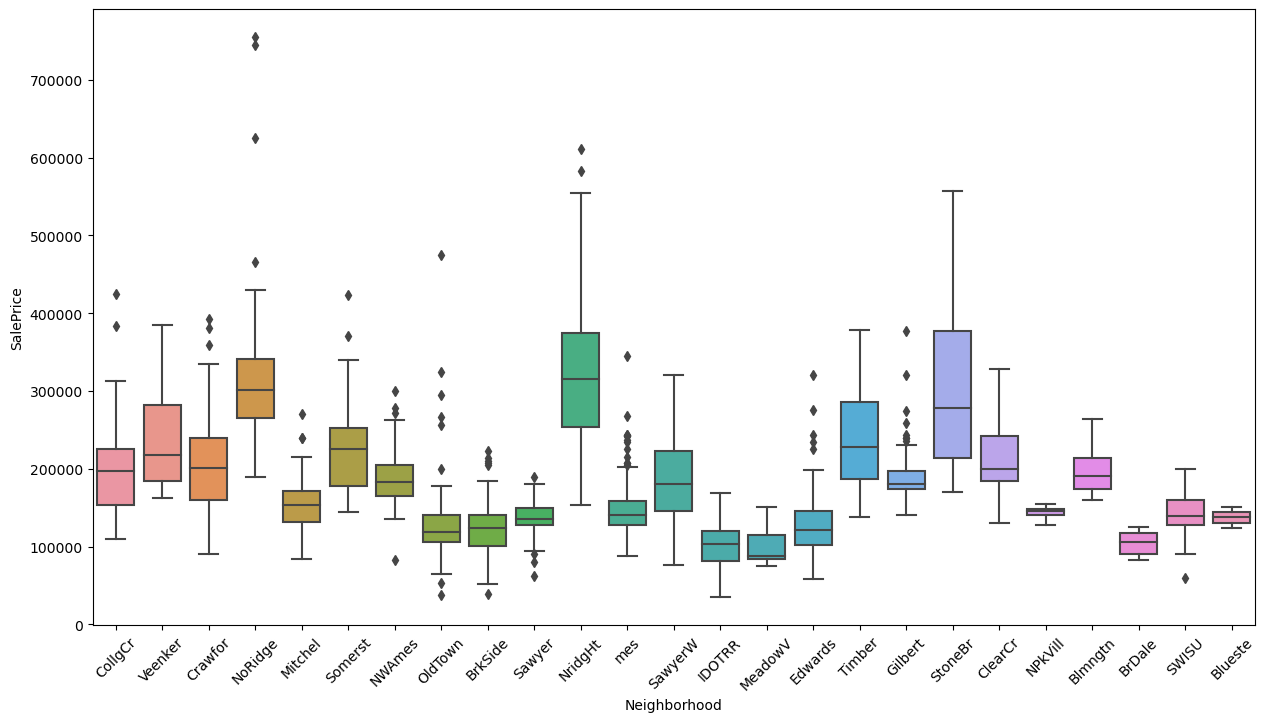

In [38]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot(x='Neighborhood', y='SalePrice', data=data_main_df)

Text(0, 0.5, 'SalePrice')

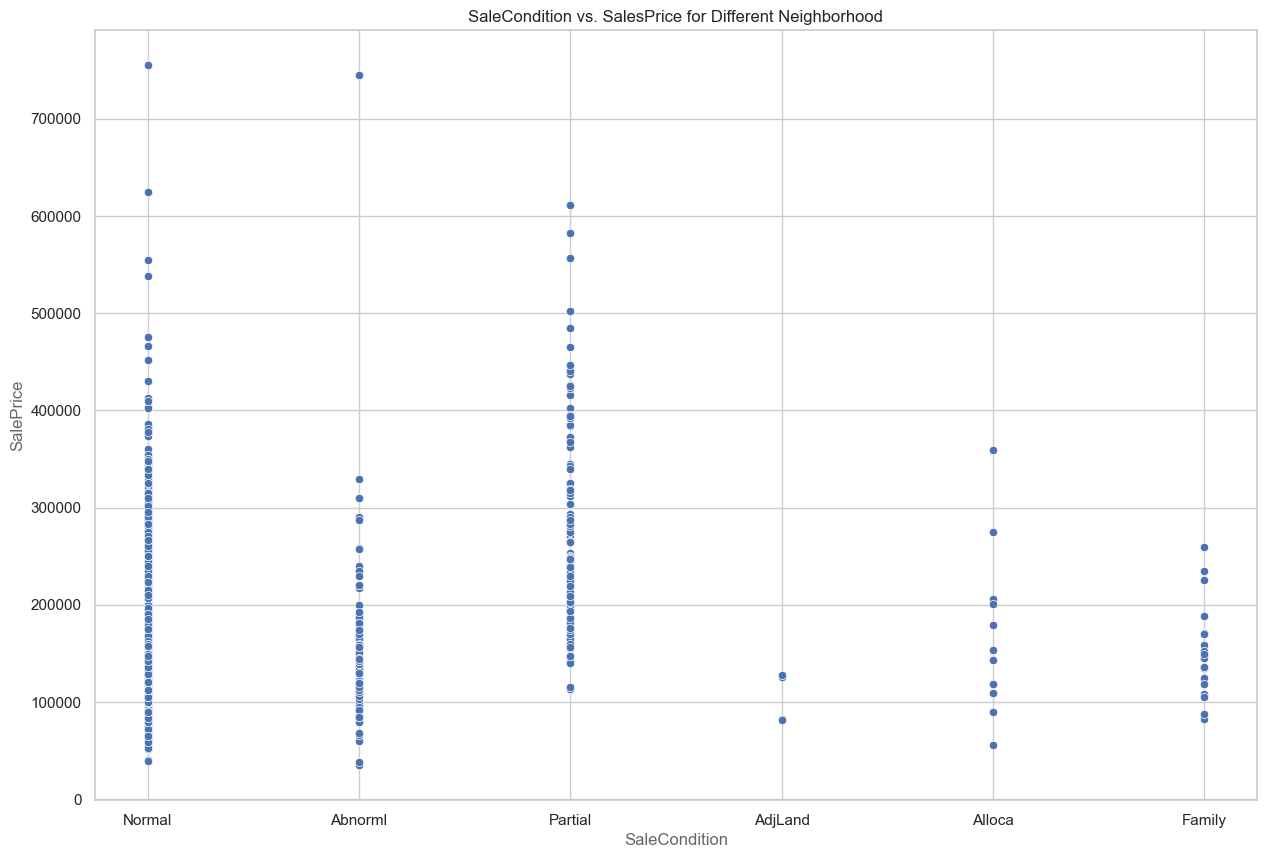

In [39]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=data_main_df, x="SaleCondition", y="SalePrice", legend=False, sizes=(20, 2000), ax=ax)
ax.set_title('SaleCondition vs. SalesPrice for Different Neighborhood')
ax.set_xlabel("SaleCondition", alpha=0.7)
ax.set_ylabel("SalePrice", alpha=0.7)

In [40]:
crosstab = pd.crosstab(index=data_main_df["Neighborhood"], columns=data_main_df["OverallQual"])
crosstab

OverallQual   1   2   3   4    5   6   7   8   9   10
Neighborhood                                         
Blmngtn        0   0   0   0    0   0  14   3   0   0
Blueste        0   0   0   0    0   2   0   0   0   0
BrDale         0   0   0   0    5  11   0   0   0   0
BrkSide        1   1   3  10   21  18   4   0   0   0
ClearCr        0   0   0   3    6  10   9   0   0   0
CollgCr        0   0   0   1   28  24  71  23   3   0
Crawfor        0   0   0   1   11  19  13   7   0   0
Edwards        1   0   5  25   38  23   5   0   1   2
Gilbert        0   0   0   1    3  33  36   5   1   0
IDOTRR         0   1   3  12   11   8   2   0   0   0
MeadowV        0   0   0  10    6   1   0   0   0   0
Mitchel        0   0   0   3   22  17   6   1   0   0
NPkVill        0   0   0   0    0   9   0   0   0   0
NWAmes         0   0   0   0    8  36  26   3   0   0
NoRidge        0   0   0   0    0   0  12  24   1   4
NridgHt        0   0   0   0    0   2  16  27  24   8
OldTown        0   0   6  17   47  22  16   3   0   2
SWISU          0   1   0   2    9  10   3   0   0   0
Sawyer         0   0   0   9   54  11   0   0   0   0
SawyerW        0   0   0   2    8  23  21   5   0   0
Somerst        0   0   0   0    0  11  41  29   4   1
StoneBr        0   0   0   0    0   0   3  16   5   1
Timber         0   0   0   0    5   6   8  16   3   0
Veenker        0   0   0   0    2   4   1   3   1   0
mes            0   0   3  20  113  74  12   3   0   0

In [41]:
sign_cat_vars = []
for col in cat_var_df.columns:
    contingency_table = pd.crosstab(cat_var_df[col], data_main_df['SalePrice'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    if p < 0.05:
        sign_cat_vars.append(col)
sign_cat_vars

['CentralAir',
 'BsmtExposure',
 'BsmtCond',
 'LotConfig',
 'Heating',
 'MasVnrType',
 'LotShape',
 'Street',
 'ExterQual',
 'SaleCondition',
 'KitchenQual',
 'Foundation',
 'GarageFinish',
 'Neighborhood',
 'MSZoning',
 'ExterCond',
 'FireplaceQu',
 'BsmtQual',
 'GarageQual',
 'SaleType']

Well, we can gi with SaleCondition, Neighborhood, OverallQual, OverallCond

OverallQual vs SalePrice

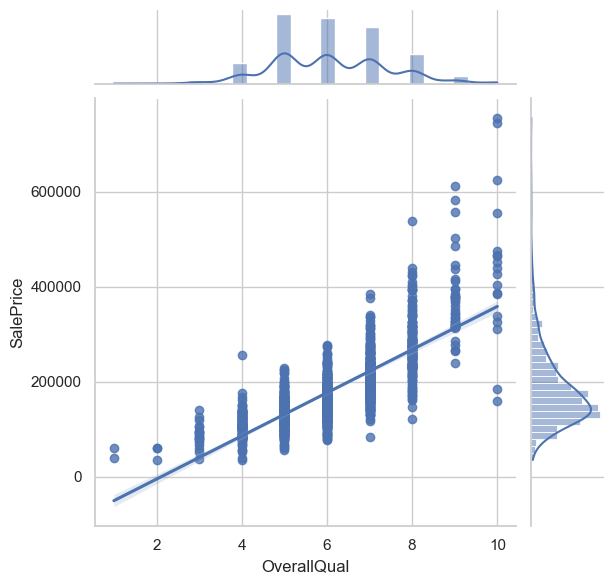

In [42]:
sns.jointplot(x = 'OverallQual',y= 'SalePrice', data=data_main_df, kind='reg')

OverallCond vs SalePrice

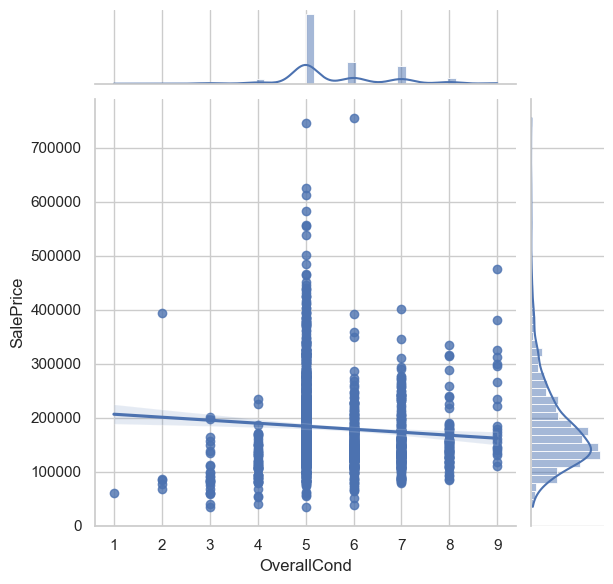

In [43]:
sns.jointplot(x = 'OverallCond',y= 'SalePrice', data=data_main_df, kind='reg')

Combining Numeric and Categorical variables

Updating Numceric and Categorical variables

In [44]:
sign_num_var = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea']
sign_cat_var = ['SaleCondition', 'Neighborhood', 'OverallQual', 'OverallCond']
sign_var = sign_num_var + sign_cat_var
req_df = data_main_df[sign_var + ['SalePrice']]
req_df

YearBuilt  TotalBsmtSF  GrLivArea SaleCondition Neighborhood  \
0          2003          856       1710        Normal      CollgCr   
1          1976         1262       1262        Normal      Veenker   
2          2001          920       1786        Normal      CollgCr   
3          1915          756       1717       Abnorml      Crawfor   
4          2000         1145       2198        Normal      NoRidge   
...         ...          ...        ...           ...          ...   
1455       1999          953       1647        Normal      Gilbert   
1456       1978         1542       2073        Normal       NWAmes   
1457       1941         1152       2340        Normal      Crawfor   
1458       1950         1078       1078        Normal          mes   
1459       1965         1256       1256        Normal      Edwards   

      OverallQual  OverallCond  SalePrice  
0               7            5     208500  
1               6            8     181500  
2               7            5     223500  
3               7            5     140000  
4               8            5     250000  
...           ...          ...        ...  
1455            6            5     175000  
1456            6            6     210000  
1457            7            9     266500  
1458            5            6     142125  
1459            5            6     147500  

[1460 rows x 8 columns]

Bosx Plot for Numerric variables

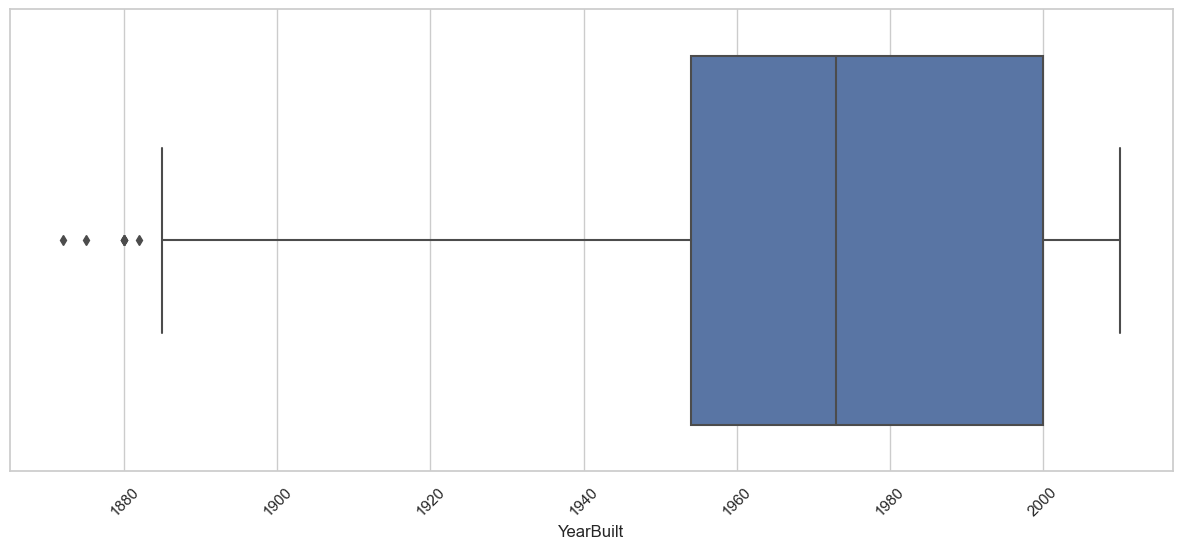

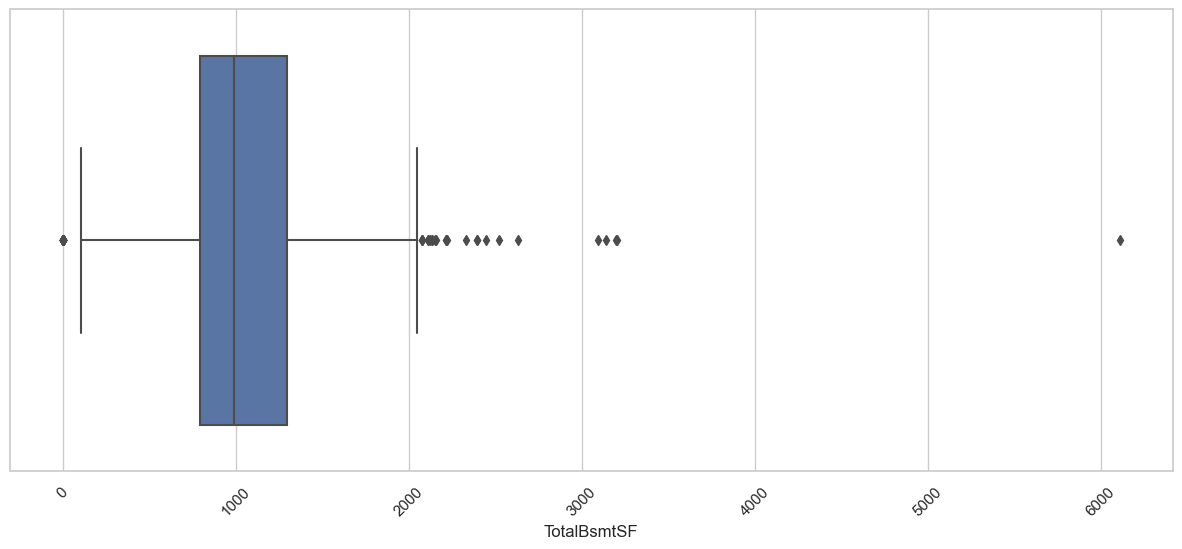

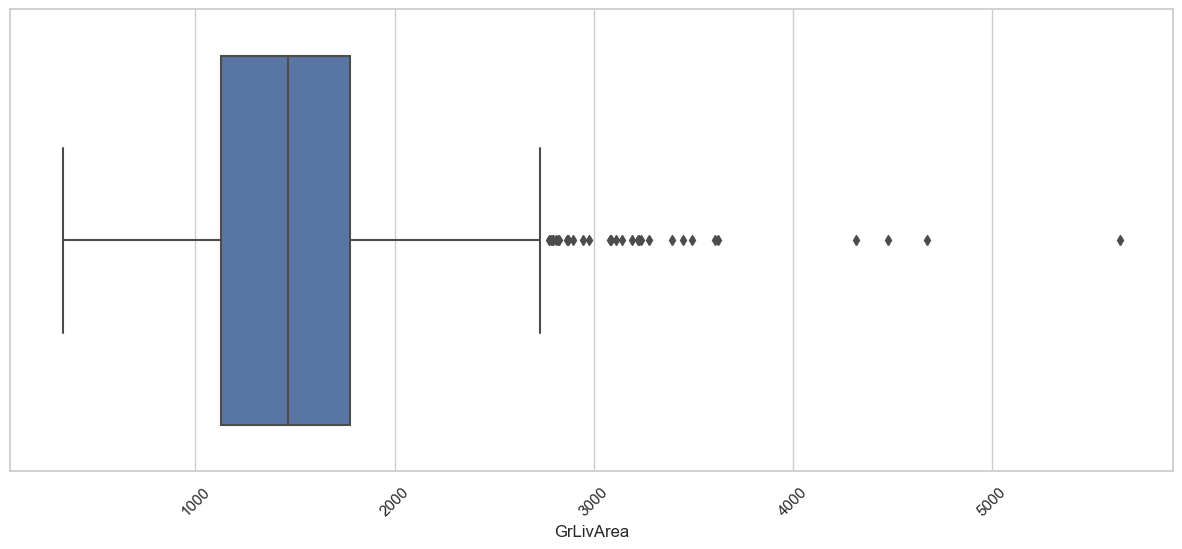

In [45]:
for n in sign_num_var:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x = n, data=req_df)
    plt.xticks(rotation=45)
    plt.show()

Bosx Plot for Categorical variables

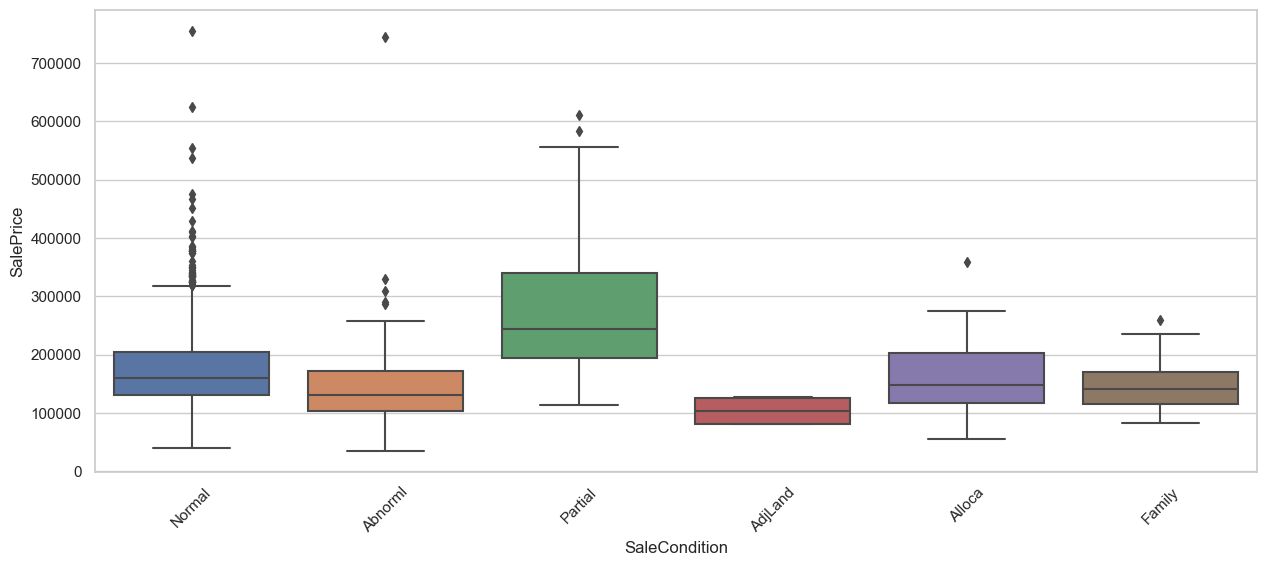

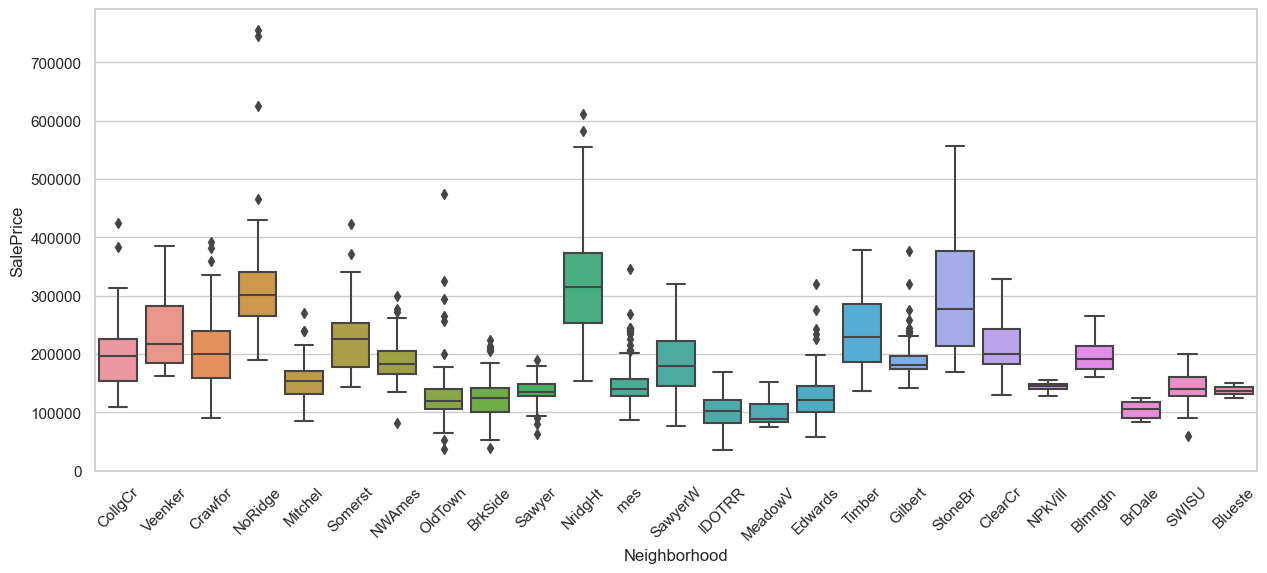

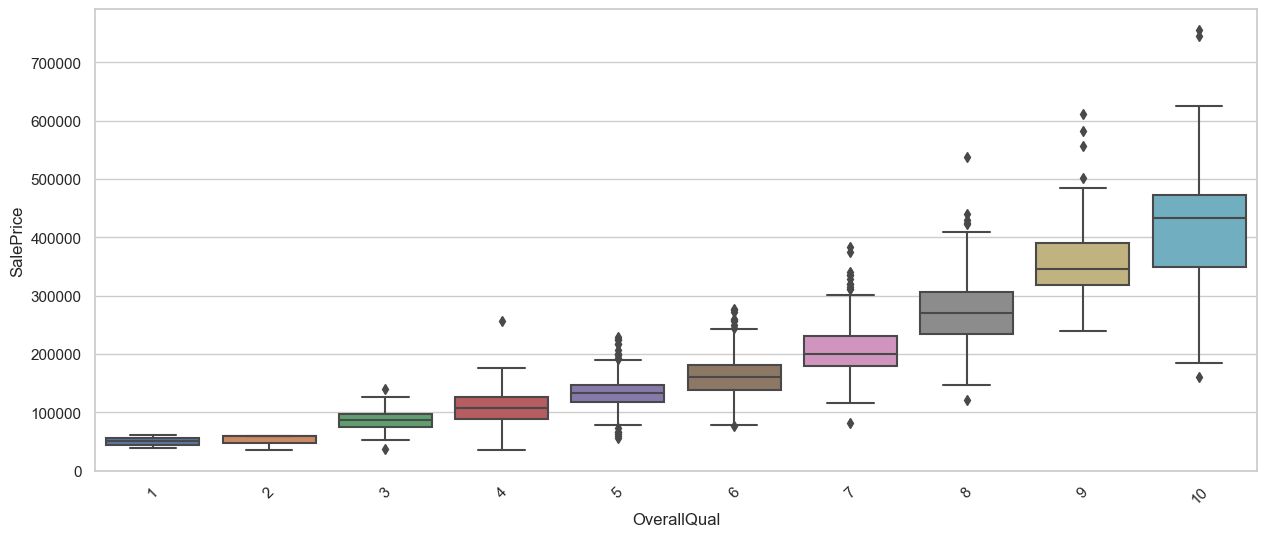

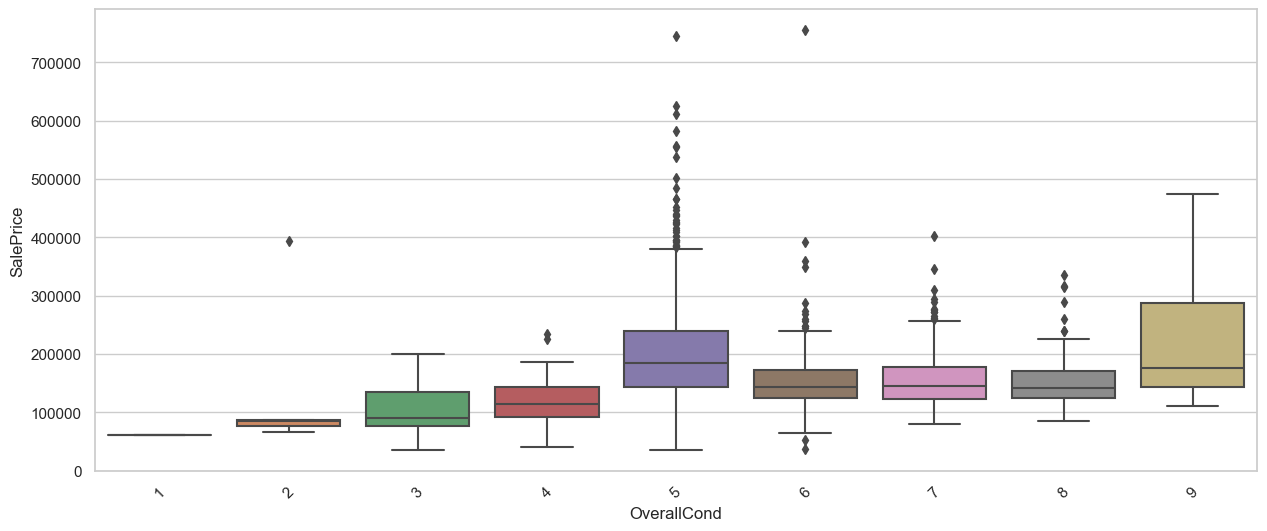

In [46]:
for c in sign_cat_var:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x = c, y = 'SalePrice', data=req_df)
    plt.xticks(rotation=45)
    plt.show()